In [1]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=QZUGSYSXCC1B19G38ETQ
%env CLEARML_API_SECRET_KEY=qHCvroHchWwGmwAcCAhaFbBLUQ90BwxVW1qoMxifgMNkHAPsk3
from clearml import Task, Dataset
task = Task.init(project_name='great project', task_name='Keras Research', output_uri = True)

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=QZUGSYSXCC1B19G38ETQ
env: CLEARML_API_SECRET_KEY=qHCvroHchWwGmwAcCAhaFbBLUQ90BwxVW1qoMxifgMNkHAPsk3
ClearML Task: created new task id=a72a59a972d541c1aa8874125735c96d
2023-10-13 12:02:09,902 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/2eea372b5e60460e98ffcfcc4b47b092/experiments/a72a59a972d541c1aa8874125735c96d/output/log


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [26]:
data_path = Dataset.get(dataset_name = "np mnist data", alias = "np mnist data").get_local_copy()
print(data_path)

train_data = np.load(f"{data_path}/train_data.npy")
test_data = np.load(f"{data_path}/test_data.npy")
noisy_test_data = np.load(f"{data_path}/noisy_test_data.npy")
noisy_train_data = np.load(f"{data_path}/noisy_train_data.npy")
y_train = np.load(f"{data_path}/y_train.npy")
y_test = np.load(f"{data_path}/y_test.npy")

2023-10-12 20:55:34,132 - clearml.storage - INFO - Downloading: 5.00MB / 461.78MB @ 0.01MBs from https://files.clear.ml/great%20project/.datasets/np%20mnist%20data/np%20mnist%20data.9af9553f06f94e8fab26f688783f879a/artifacts/data/dataset.9af9553f06f94e8fab26f688783f879a.s3yevl67.zip
2023-10-12 21:04:28,636 - clearml.storage - ERROR - Could not download https://files.clear.ml/great%20project/.datasets/np%20mnist%20data/np%20mnist%20data.9af9553f06f94e8fab26f688783f879a/artifacts/data/dataset.9af9553f06f94e8fab26f688783f879a.s3yevl67.zip , err: HTTPSConnectionPool(host='files.clear.ml', port=443): Read timed out. 


ValueError: Could not download dataset id=9af9553f06f94e8fab26f688783f879a entry=data

ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


In [3]:

current_directory = "C:\\Users\\egors\\jupyter"

data_path = f"{current_directory}\\files"

train_data = np.load(f"{data_path}\\train_data.npy")
test_data = np.load(f"{data_path}\\test_data.npy")
noisy_test_data = np.load(f"{data_path}\\noisy_test_data.npy")
noisy_train_data = np.load(f"{data_path}\\noisy_train_data.npy")
y_train = np.load(f"{data_path}\\y_train.npy")
y_test = np.load(f"{data_path}\\y_test.npy")

ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# сверточная сеть для распознания цифер
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [6]:
# Создание сверточной сети

data = {"batch_size":64, "epochs":2, "first layer filter":5, "second layer filter":3, "MaxPooling":2}
task.connect(data)

input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (data["first layer filter"], data["first layer filter"]), activation='relu')(input_img)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (data["second layer filter"], data["second layer filter"]), activation='relu')(x)
x = MaxPooling2D((data["MaxPooling"], data["MaxPooling"]))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(input_img, output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_data, y_train_cat, batch_size = data["batch_size"], epochs = data["epochs"], validation_data=(test_data, y_test_cat))

Epoch 1/2
938/938 [==============================] - 35s 36ms/step - loss: 0.1432 - accuracy: 0.9567 - val_loss: 0.0462 - val_accuracy: 0.9846
Epoch 2/2
938/938 [==============================] - 33s 35ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0384 - val_accuracy: 0.9868


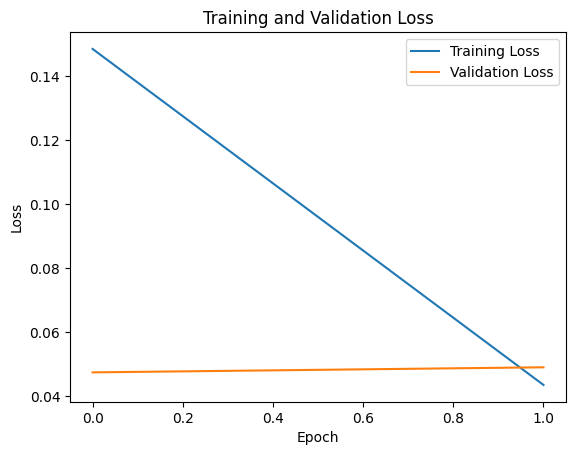

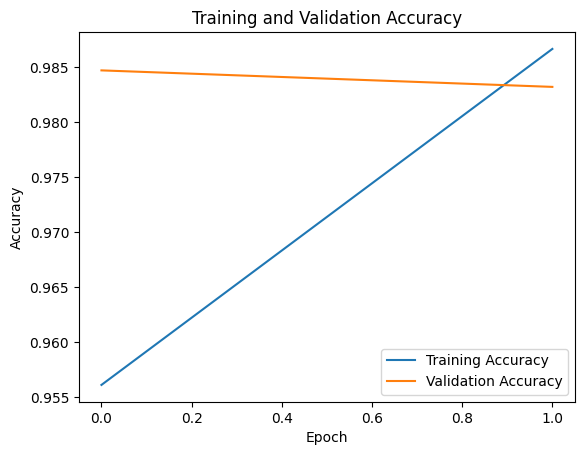

TypeError: Task.upload_artifact() missing 1 required positional argument: 'artifact_object'

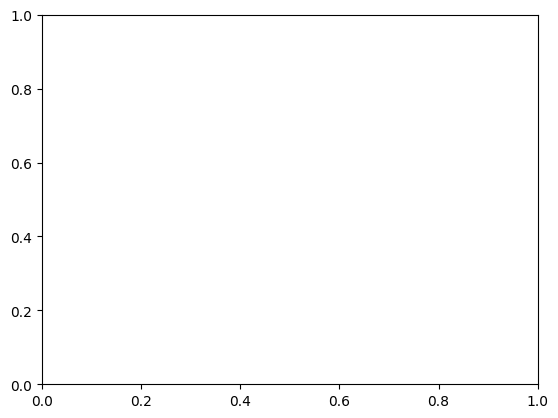

In [21]:
# Построение графика функции потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('loss_plot.png')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('Training_and_Validation_Accuracy.png')

# Оценка производительности модели
score = model.evaluate(test_data, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

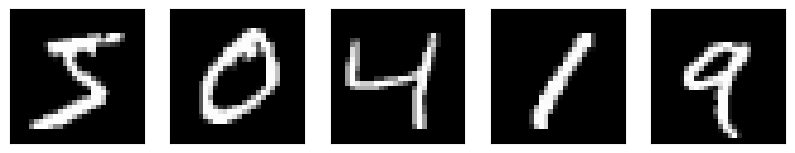

1/1 [==============================] - 0s 238ms/step
5
1/1 [==============================] - 0s 33ms/step
0
1/1 [==============================] - 0s 51ms/step
4
1/1 [==============================] - 0s 55ms/step
1
1/1 [==============================] - 0s 56ms/step
9


In [23]:
def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()


n=5
imgs = train_data[:n]
for img in imgs:
    prediction = model.predict(img.reshape(1, 28, 28, 1))
    predicted_class = np.argmax(prediction)
    print(predicted_class)
